# Задание 5.3

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def f(x): 
    return np.sin(x / 5) * np.e ** (x / 10) + 5 * np.e ** (- 1 / 2 * x)

### 1. Полиномиальная регрессия 

In [9]:
def polynomial(n):
    x = np.linspace(1, 15, n)
    A = np.power((np.ones((n, n)) * x).T, np.linspace(0, n - 1, n))
    B = f(x)
    W = np.linalg.solve(A, B)
    return np.sum((W * A), axis=1), B

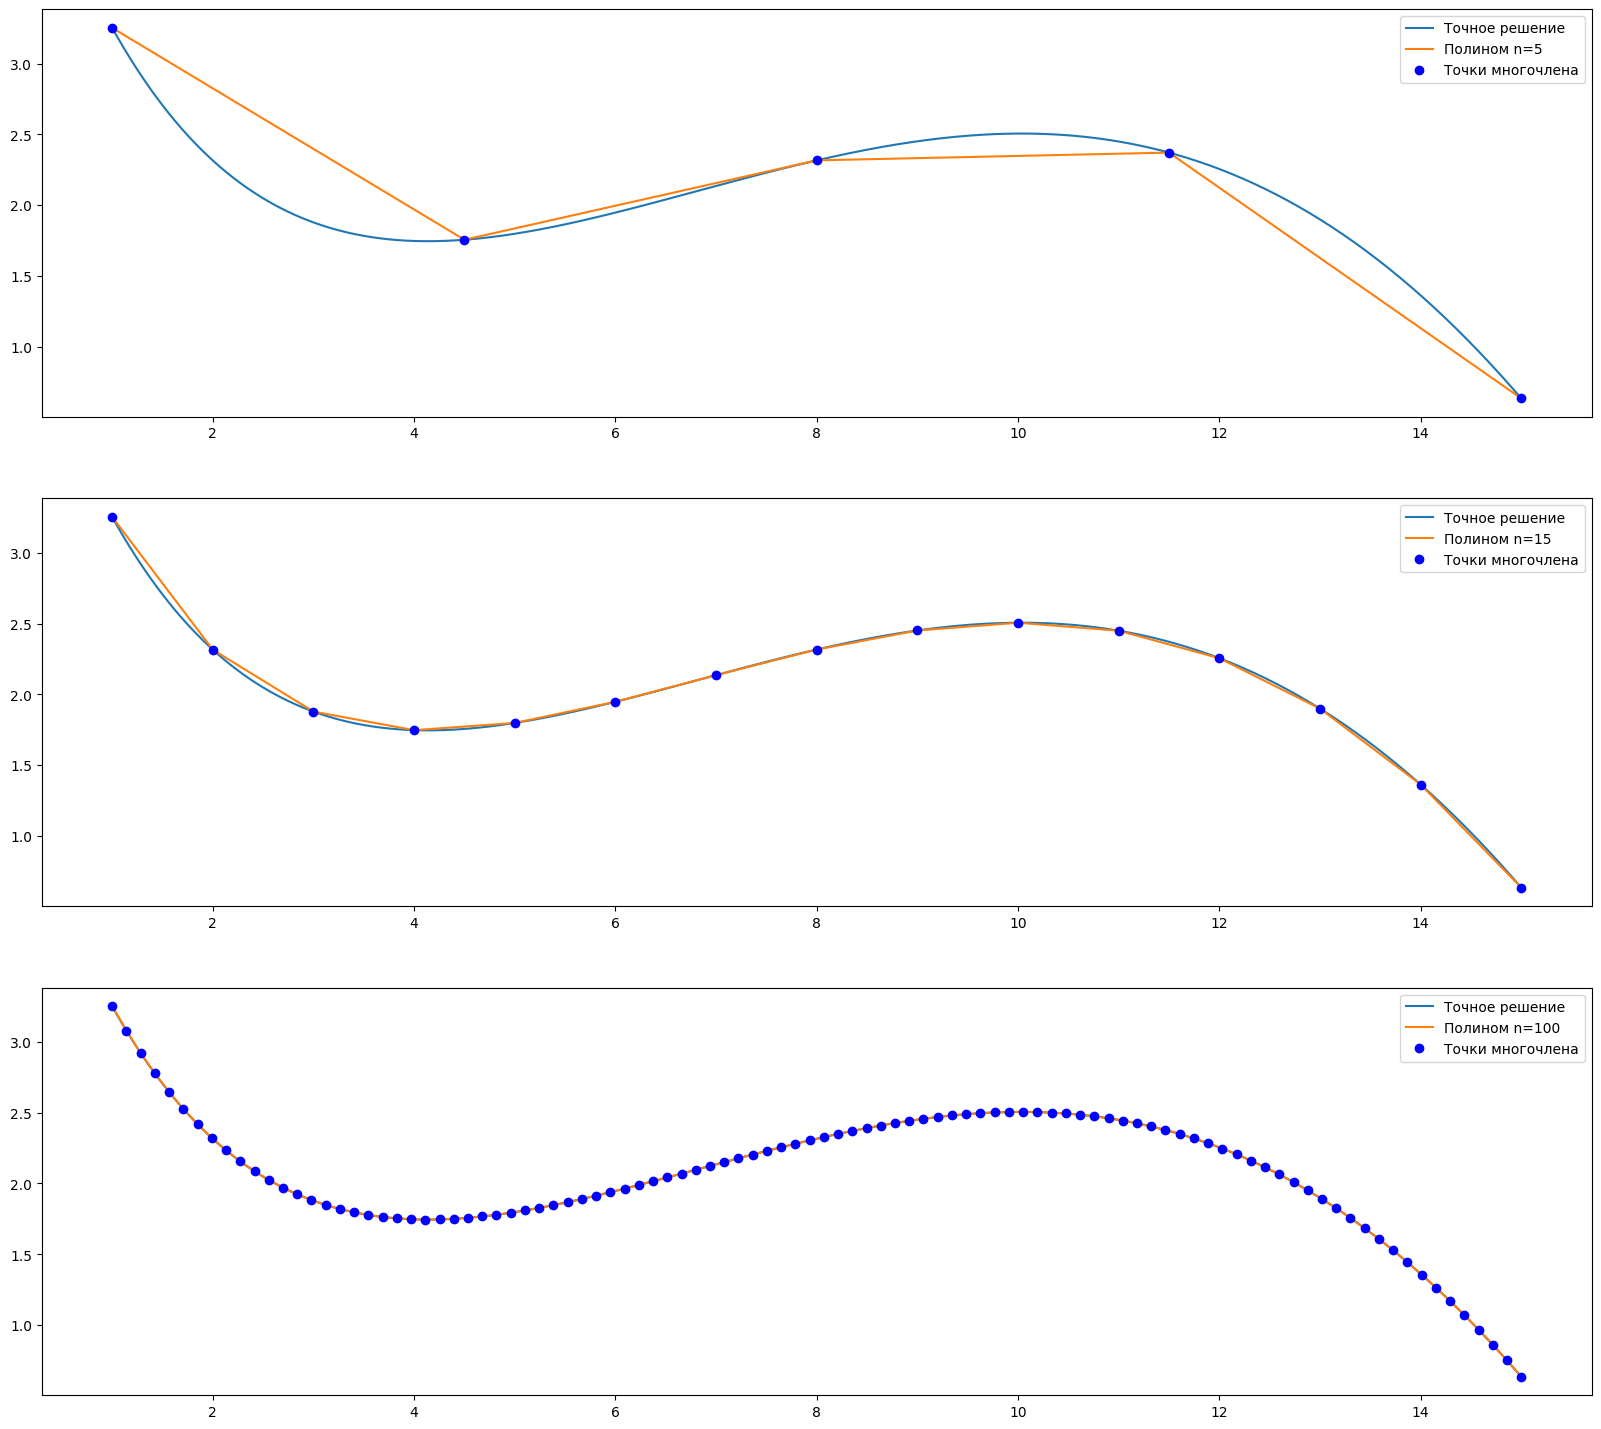

In [14]:
fig, axes = plt.subplots(3, figsize=(20, 18))
x = np.linspace(1, 15, 500)
y = f(x)
axes[0].plot(x, y, label = "Точное решение")
axes[1].plot(x, y, label = "Точное решение")
axes[2].plot(x, y, label = "Точное решение")
x = np.linspace(1, 15, 5)
y, points = polynomial(5)
axes[0].plot(x, y, label = "Полином n=5")
axes[0].plot(x, points,"bo", label = "Точки многочлена")
axes[0].legend()
x = np.linspace(1, 15, 15)
y, points = polynomial(15)
axes[1].plot(x, y, label = "Полином n=15")
axes[1].plot(x, points,"bo", label = "Точки многочлена")
axes[1].legend()
x = np.linspace(1, 15, 100)
y, points = polynomial(100)
axes[2].plot(x, y, label = "Полином n=100")
axes[2].plot(x, points,"bo", label = "Точки многочлена")
axes[2].legend()

### При увеличении числа точек точность приближения увеличивается. При n=5 полином крайне грубо приближает, вряд ли можно назвать результат удовлетворительным. При n=15 результат удовлетворительный, визуально графики полинома и точного решения функции почти совпадают

### 2. Полиномиальная регрессия с зашумлённым данными 

In [20]:
def polynomial_with_inaccuracy(n):
    inaccuracy = np.random.normal(0, 0.01, n)
    x = np.linspace(1, 15, n)
    A = np.power((np.ones((n, n)) * x).T, np.linspace(0, n - 1, n))
    B = f(x) + inaccuracy
    W = np.linalg.solve(A, B)
    return np.sum((W * A), axis=1), B

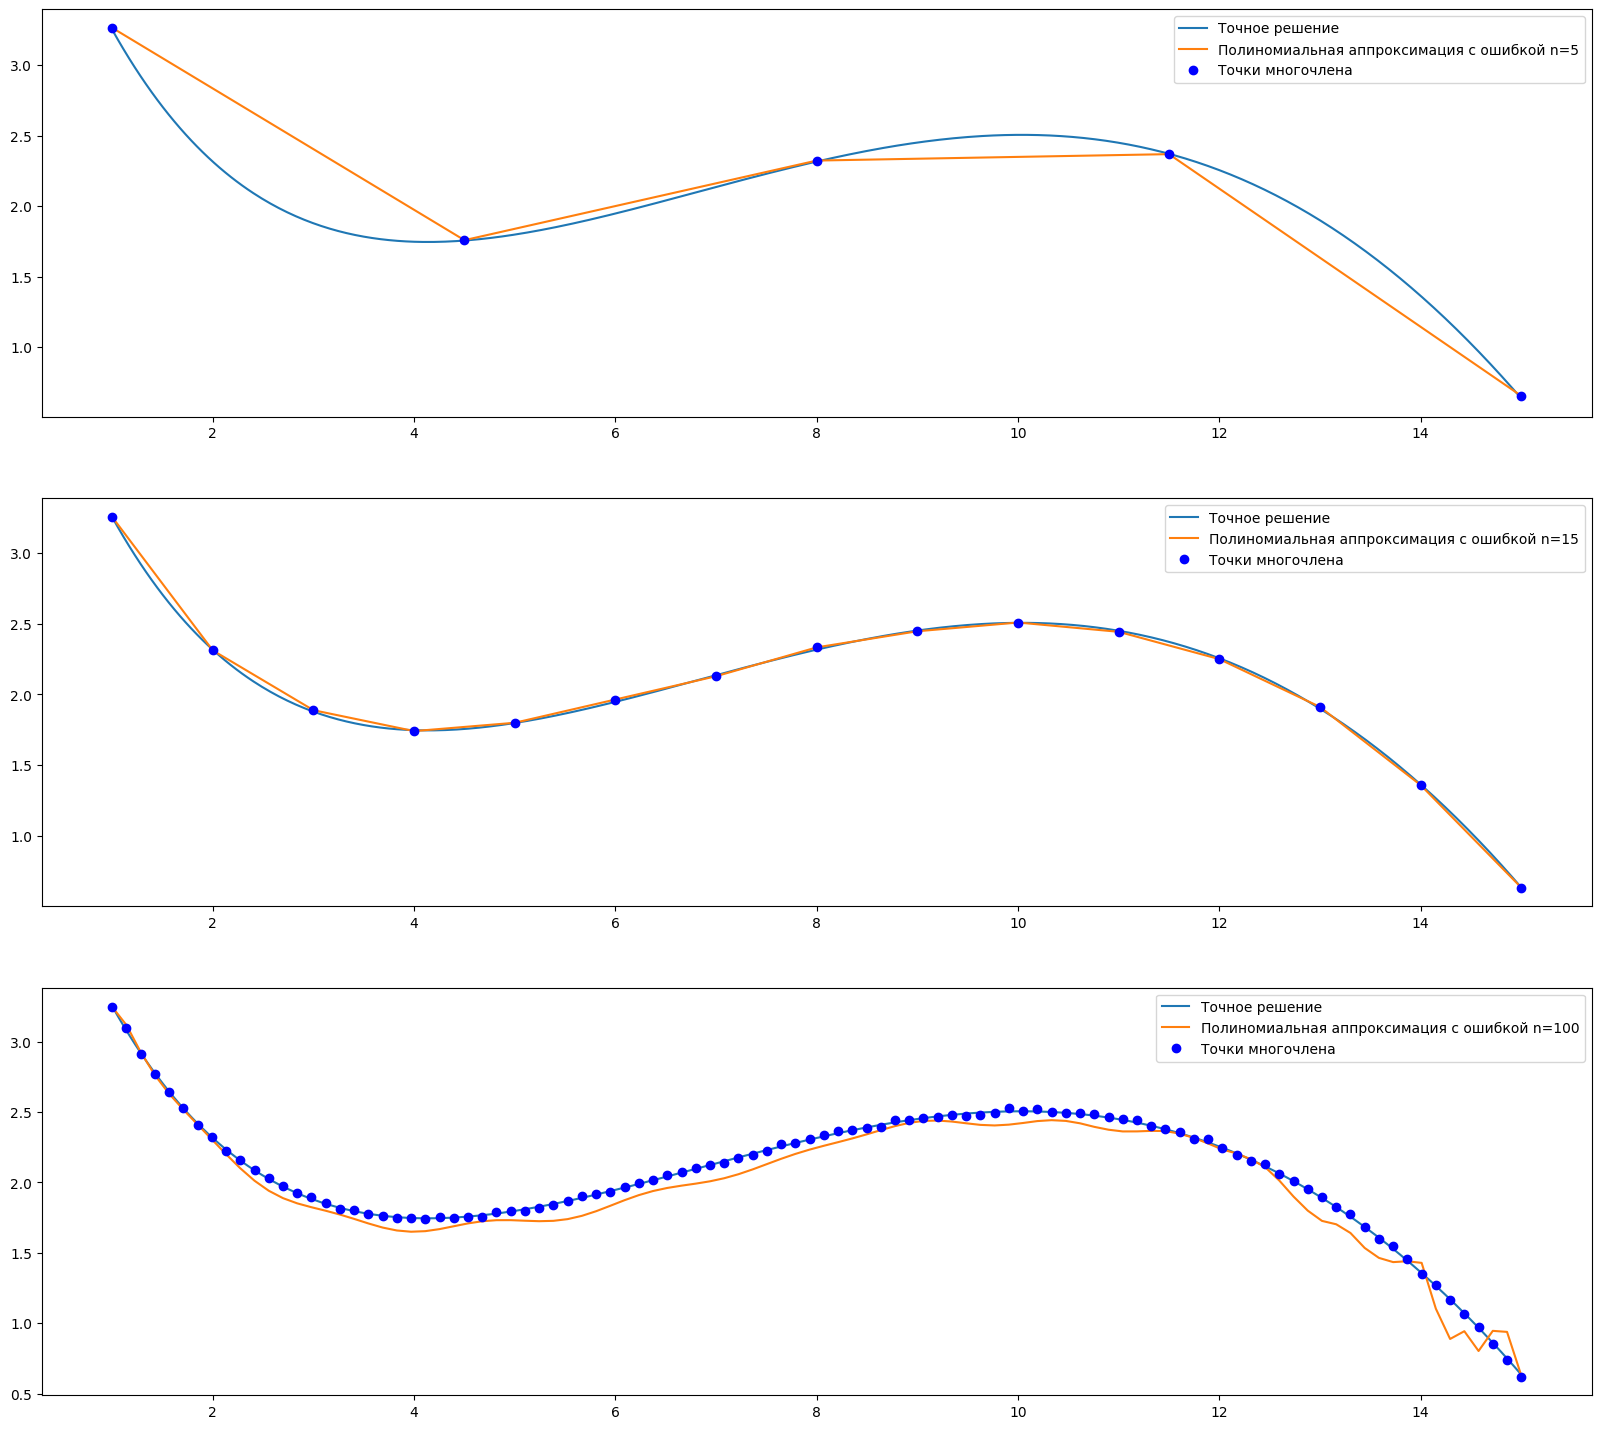

In [29]:
fig, axes = plt.subplots(3, figsize=(20, 18))
x = np.linspace(1, 15, 500)
y = f(x)
axes[0].plot(x, y, label = "Точное решение")
axes[1].plot(x, y, label = "Точное решение")
axes[2].plot(x, y, label = "Точное решение")
x = np.linspace(1, 15, 5)
y, points = polynomial_with_inaccuracy(5)
axes[0].plot(x, y, label = "Полиномиальная аппроксимация c ошибкой n=5")
axes[0].plot(x, points,"bo", label = "Точки многочлена")
axes[0].legend()
x = np.linspace(1, 15, 15)
y, points = polynomial_with_inaccuracy(15)
axes[1].plot(x, y, label = "Полиномиальная аппроксимация c ошибкой n=15")
axes[1].plot(x, points,"bo", label = "Точки многочлена")
axes[1].legend()
x = np.linspace(1, 15, 100)
y, points = polynomial_with_inaccuracy(100)
axes[2].plot(x, y, label = "Полиномиальная аппроксимация c ошибкой n=100")
axes[2].plot(x, points,"bo", label = "Точки многочлена")
axes[2].legend()

### При малом количестве точек шум почти не влияет на построение полинома, но если увеличить их количество(n>20), то аппроксимация становится неточной, поэтому при n=5, мы получаем приблизительную аппроксимацию, при n=15 полином хорошо приближает функцию, при n=100 появляются скачки. 

### 3. Метод наименьших квадратов 

In [35]:
def calculation_method_minimum_squares(N):
    n = 4
    inaccuracy = np.random.normal(0, 0.1, N)
    x = np.linspace(1, 15, N)
    A = np.power((np.ones((n, N)) * x).T, np.linspace(0, n - 1, n))
    B = f(x) + inaccuracy
    W = np.linalg.lstsq(A, B, rcond=None)
    return np.sum((W[0] * A), axis=1), B

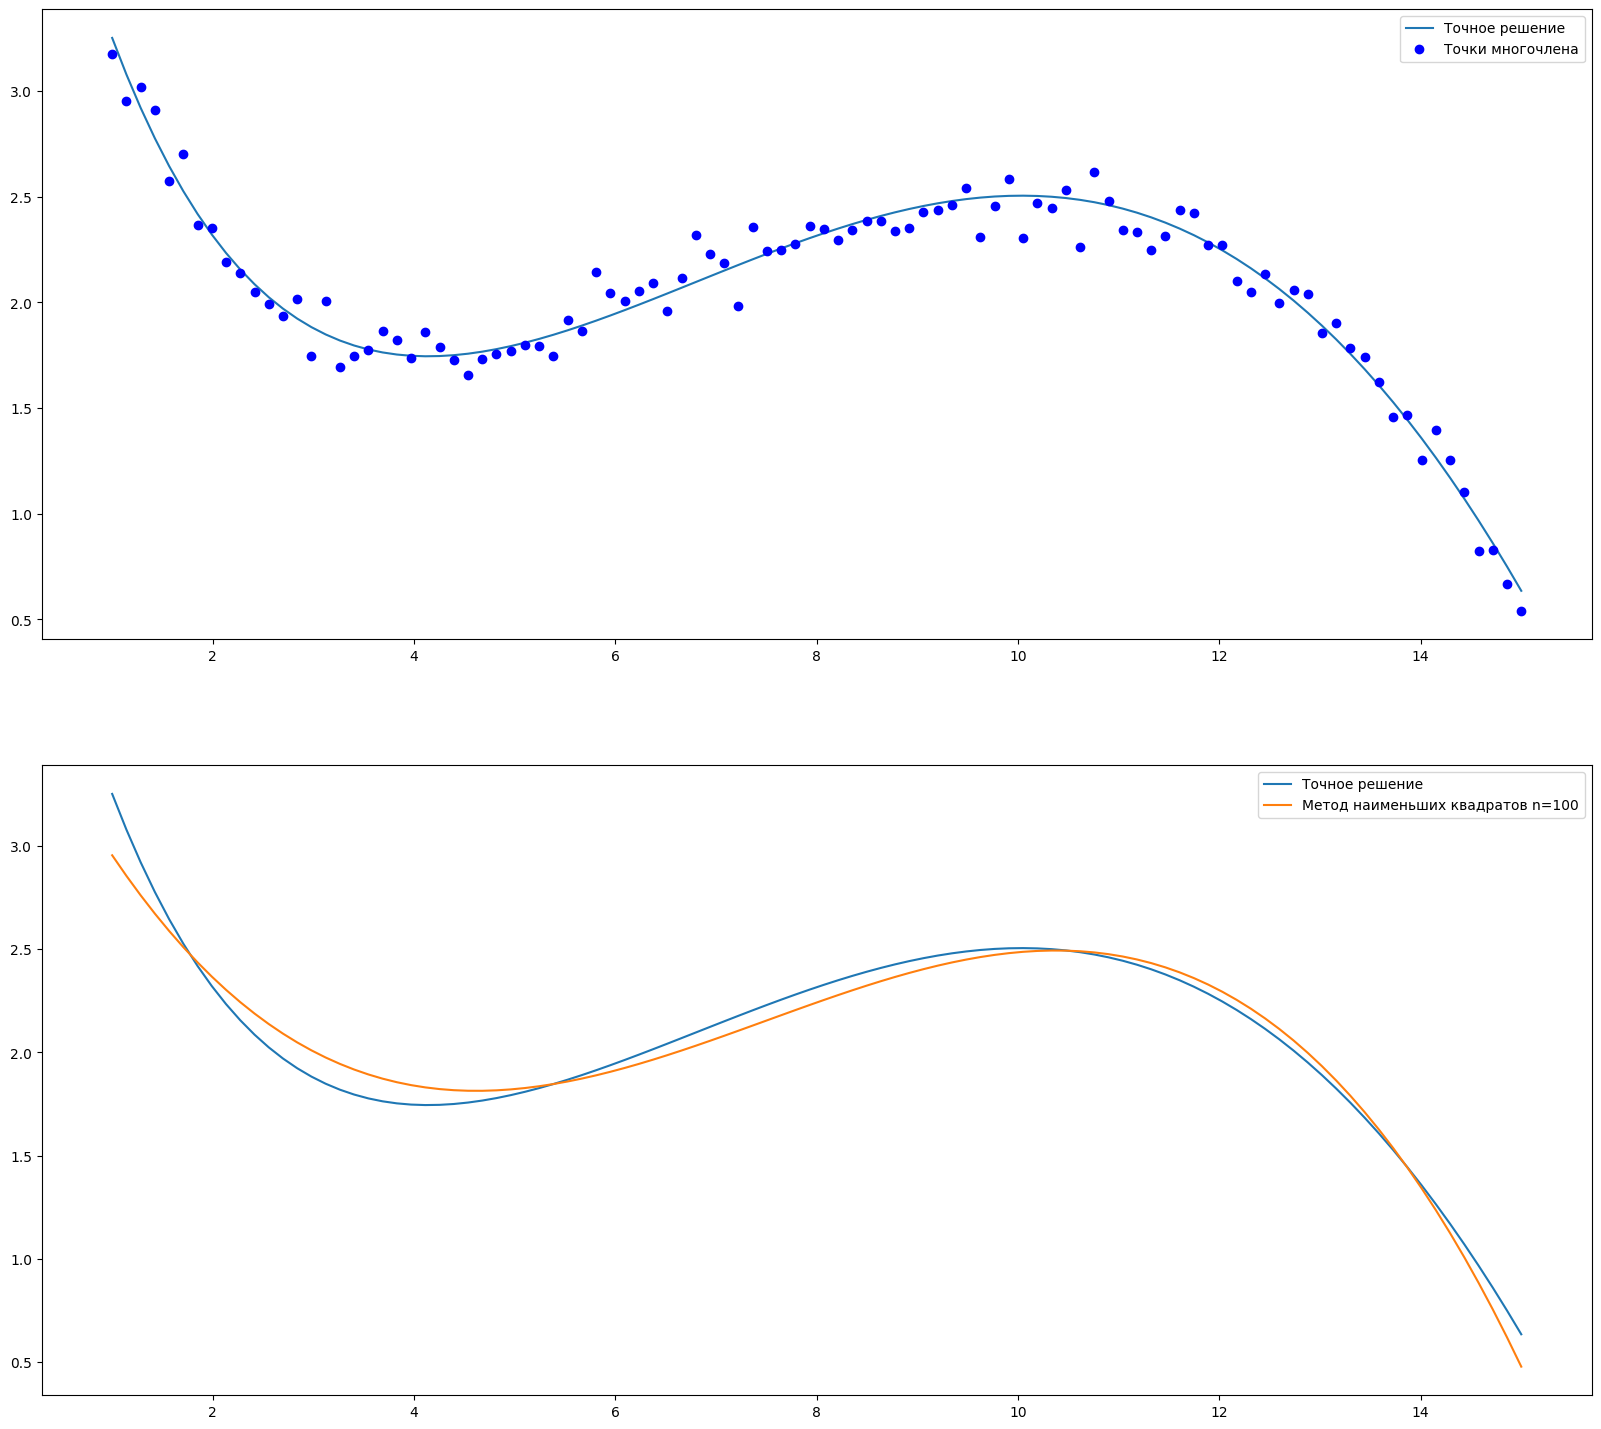

In [43]:
fig, axes = plt.subplots(2, figsize=(20, 18))
x = np.linspace(1, 15, 100)
y = f(x)
axes[0].plot(x, y, label = "Точное решение")
axes[1].plot(x, y, label = "Точное решение")
x = np.linspace(1, 15, 100)
y, points = calculation_method_minimum_squares(100)
axes[0].plot(x, points,"bo", label = "Точки многочлена")
axes[1].plot(x, y, label = "Метод наименьших квадратов n=100")
axes[0].legend()
axes[1].legend()

## Вывод: полиномиальная регрессия хорошо приближает функцию в том случае, если мы используем большое количество точек, а также отсутсвует шум. Если же шум присутсвует, тогда лучше пользоваться небольшим количеством точек, иначе график начинает строится скачкообразно. Метод наименьших квадратов дает довольно точное приближение, при условии, что мы имеем полином 3-й степени. Полиномиальная регрессия не дала бы такого точного решения, при такой степени полинома.